# **Project - Health Insurance Cross Sell Prediction**

### Project Type - Classification

### Contributor - Sourabh Pandey

![picture](https://drive.google.com/uc?export=view&id=1FrMSrxO4Nja84XuAnscg57WqS31t1xwD)

# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

id : Unique ID for the customer

Gender : Gender of the customer

Age : Age of the customer

Driving_License : 0 : Customer does not have DL, 1 : Customer already has DL

Region_Code : Unique code for the region of the customer

Previously_Insured : 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

Vehicle_Age : Age of the Vehicle

Vehicle_Damage : 1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

Annual_Premium : The amount customer needs to pay as premium in the year

PolicySalesChannel : Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

Vintage : Number of Days, Customer has been associated with the company

Response : 1 : Customer is interested, 0 : Customer is not interested

# **Aim of the Project**

The goal of our client is to determine whether or not employees who have health insurance will also buy vehicle insurance. We need to create a model that can predict based on the data provided whether current policyholders are also interested in vehicle insurance provided by the company.

## **Table of content**

Step 1: Importing libraries and Loading Dataset

Step 2: Data Inspection (Getting to know the data)

Step 3: Exploratory Data Analysis

Step 4: Feature selection

Step 5: Feature engineering

Step 6: Train and Test split

Step 7: Model training

Step 8: Hyperparameter Tuning and Cross Validation

Step 9: Conclusion

# Importing the Libraries and Loading the dataset

In [1]:
pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 2.1 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBRFClassifier
from sklearn.tree import DecisionTreeClassifier
import lightgbm as ltb

from sklearn.model_selection import GridSearchCV
from skopt import BayesSearchCV
import time
from math import sqrt
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, roc_auc_score, classification_report
from skopt.space import Real, Categorical, Integer

## Loading the Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df= pd.read_csv('/content/drive/MyDrive/Health Insurance Cross Sell/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

In [5]:
#Copying the dataset
data = df.copy()

# Data Inspection(Getting to know our Data)

In [6]:
#Showing first 5 rows
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [7]:
#Showing Last 5 rows
data.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


In [8]:
#Finding the size of the dataset
data.shape

(381109, 12)

Display the complete summary of the dataset

df.info() gives the summary of the dataframe including data types, shape and memory storage.

In [9]:
#Check datatype and null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


### Observation-

The dataset has 3 different dtype kinds. They are object, int, and float. There are 3 categorical features and the rest are numerical.

## Checking Columns in dataset

In [10]:
data.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

## Checking the null values

The isnull() function returns a specified value if the expression is NULL. If the expression is NOT NULL, this function returns the expression.

In [11]:
# Checking for NUll Values
data.isna().sum().to_frame().rename(columns={0:'Missing Value '})

,Missing Value
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


No null values in this dataset

## Checking Unique values

The nunique() method returns the number of unique values for each column.

In [12]:
#checking unique values of each features
data.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

### Observations

1. We can omit the column named - id, as it has all unique values
2. We can apply encoding on the following categorical columns i.e. Gender, Vehicle_Damage and Vehicle_Age
3. We can apply encoding on the following continious columns i.e. Age, Previously_Insured, Driving_license

## Checking for Duplicates in Dataset

In [13]:
#Finding Duplicate values
len(data[data.duplicated()])

0

## Descriptive Statistics

## Checking the statistics of our data like mean, standard deviation and so on..

In [14]:
data.describe(include='all')

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109,381109.000000,381109.000000,381109.000000,381109.000000,381109,381109,381109.000000,381109.000000,381109.000000,381109.000000
unique,NaN,2,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,1-2 Year,Yes,NaN,NaN,NaN,NaN
freq,NaN,206089,NaN,NaN,NaN,NaN,200316,192413,NaN,NaN,NaN,NaN
mean,190555.000000,NaN,38.822584,0.997869,26.388807,0.458210,NaN,NaN,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,NaN,15.511611,0.046110,13.229888,0.498251,NaN,NaN,17213.155057,54.203995,83.671304,0.327936
min,1.000000,NaN,20.000000,0.000000,0.000000,0.000000,NaN,NaN,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,NaN,25.000000,1.000000,15.000000,0.000000,NaN,NaN,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,NaN,36.000000,1.000000,28.000000,0.000000,NaN,NaN,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,NaN,49.000000,1.000000,35.000000,1.000000,NaN,NaN,39400.000000,152.000000,227.000000,0.000000


### Observations

1. We can see that out of 381109 insurance holders majority i.e. 206089 are male.
2. We can also see that the mean age of a policy holder is 38.822584 with the youngest and eldest being 20 and 85 respectively.
3. Maximum premium paid by a client in a year is 5,40,165 and the minimum premium paid is 2630, with an average premium of 30564. Infering that people prefer to pay lesser premium.
4. People are associated with the company for a maximum of 299 days, minimum for 10 days and 154 days on average.
5. The age range of 1-2 years vehicles is highest in our dataset.
6. More than 50% of vehicles are damaged.

# Exploratory Data Analysis

In [15]:
#Storing target column into a variable
Dependent_variable = data['Response']

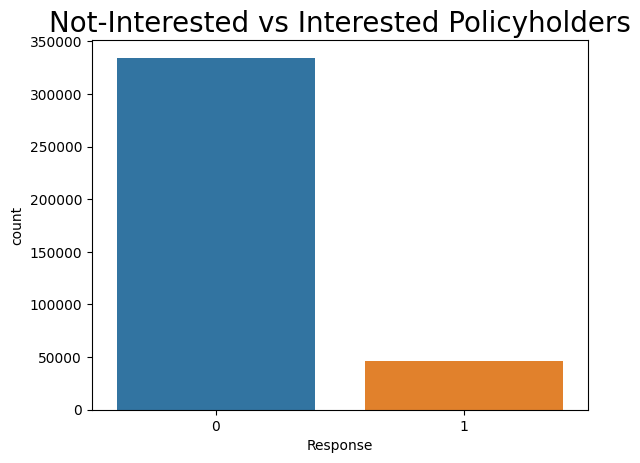

In [16]:
#Plot the count of the target variable
sns.countplot(x='Response', data=data)
plt.title('Not-Interested vs Interested Policyholders', fontsize=20) #title for the countplot
plt.show()

In [17]:
data.Response.value_counts()/data.shape[0]

0    0.877437
1    0.122563
Name: Response, dtype: float64

### Observations

1. This dependent variable has binary values of 0 and 1
2. This data set is highly imbalanced.
3. 87.7% of people were not intersted in taking policy while only 12.2% showed their intrest in it.

## Plotting the pair plot

A pair plot, also known as a scatterplot matrix, is a graphical tool used to visualize the relationships between multiple variables in a dataset. It allows you to examine the pairwise relationships between variables by creating a grid of scatterplots, where each variable is plotted against every other variable.

Text(0.5, 1.0, 'Relationship between each variable')

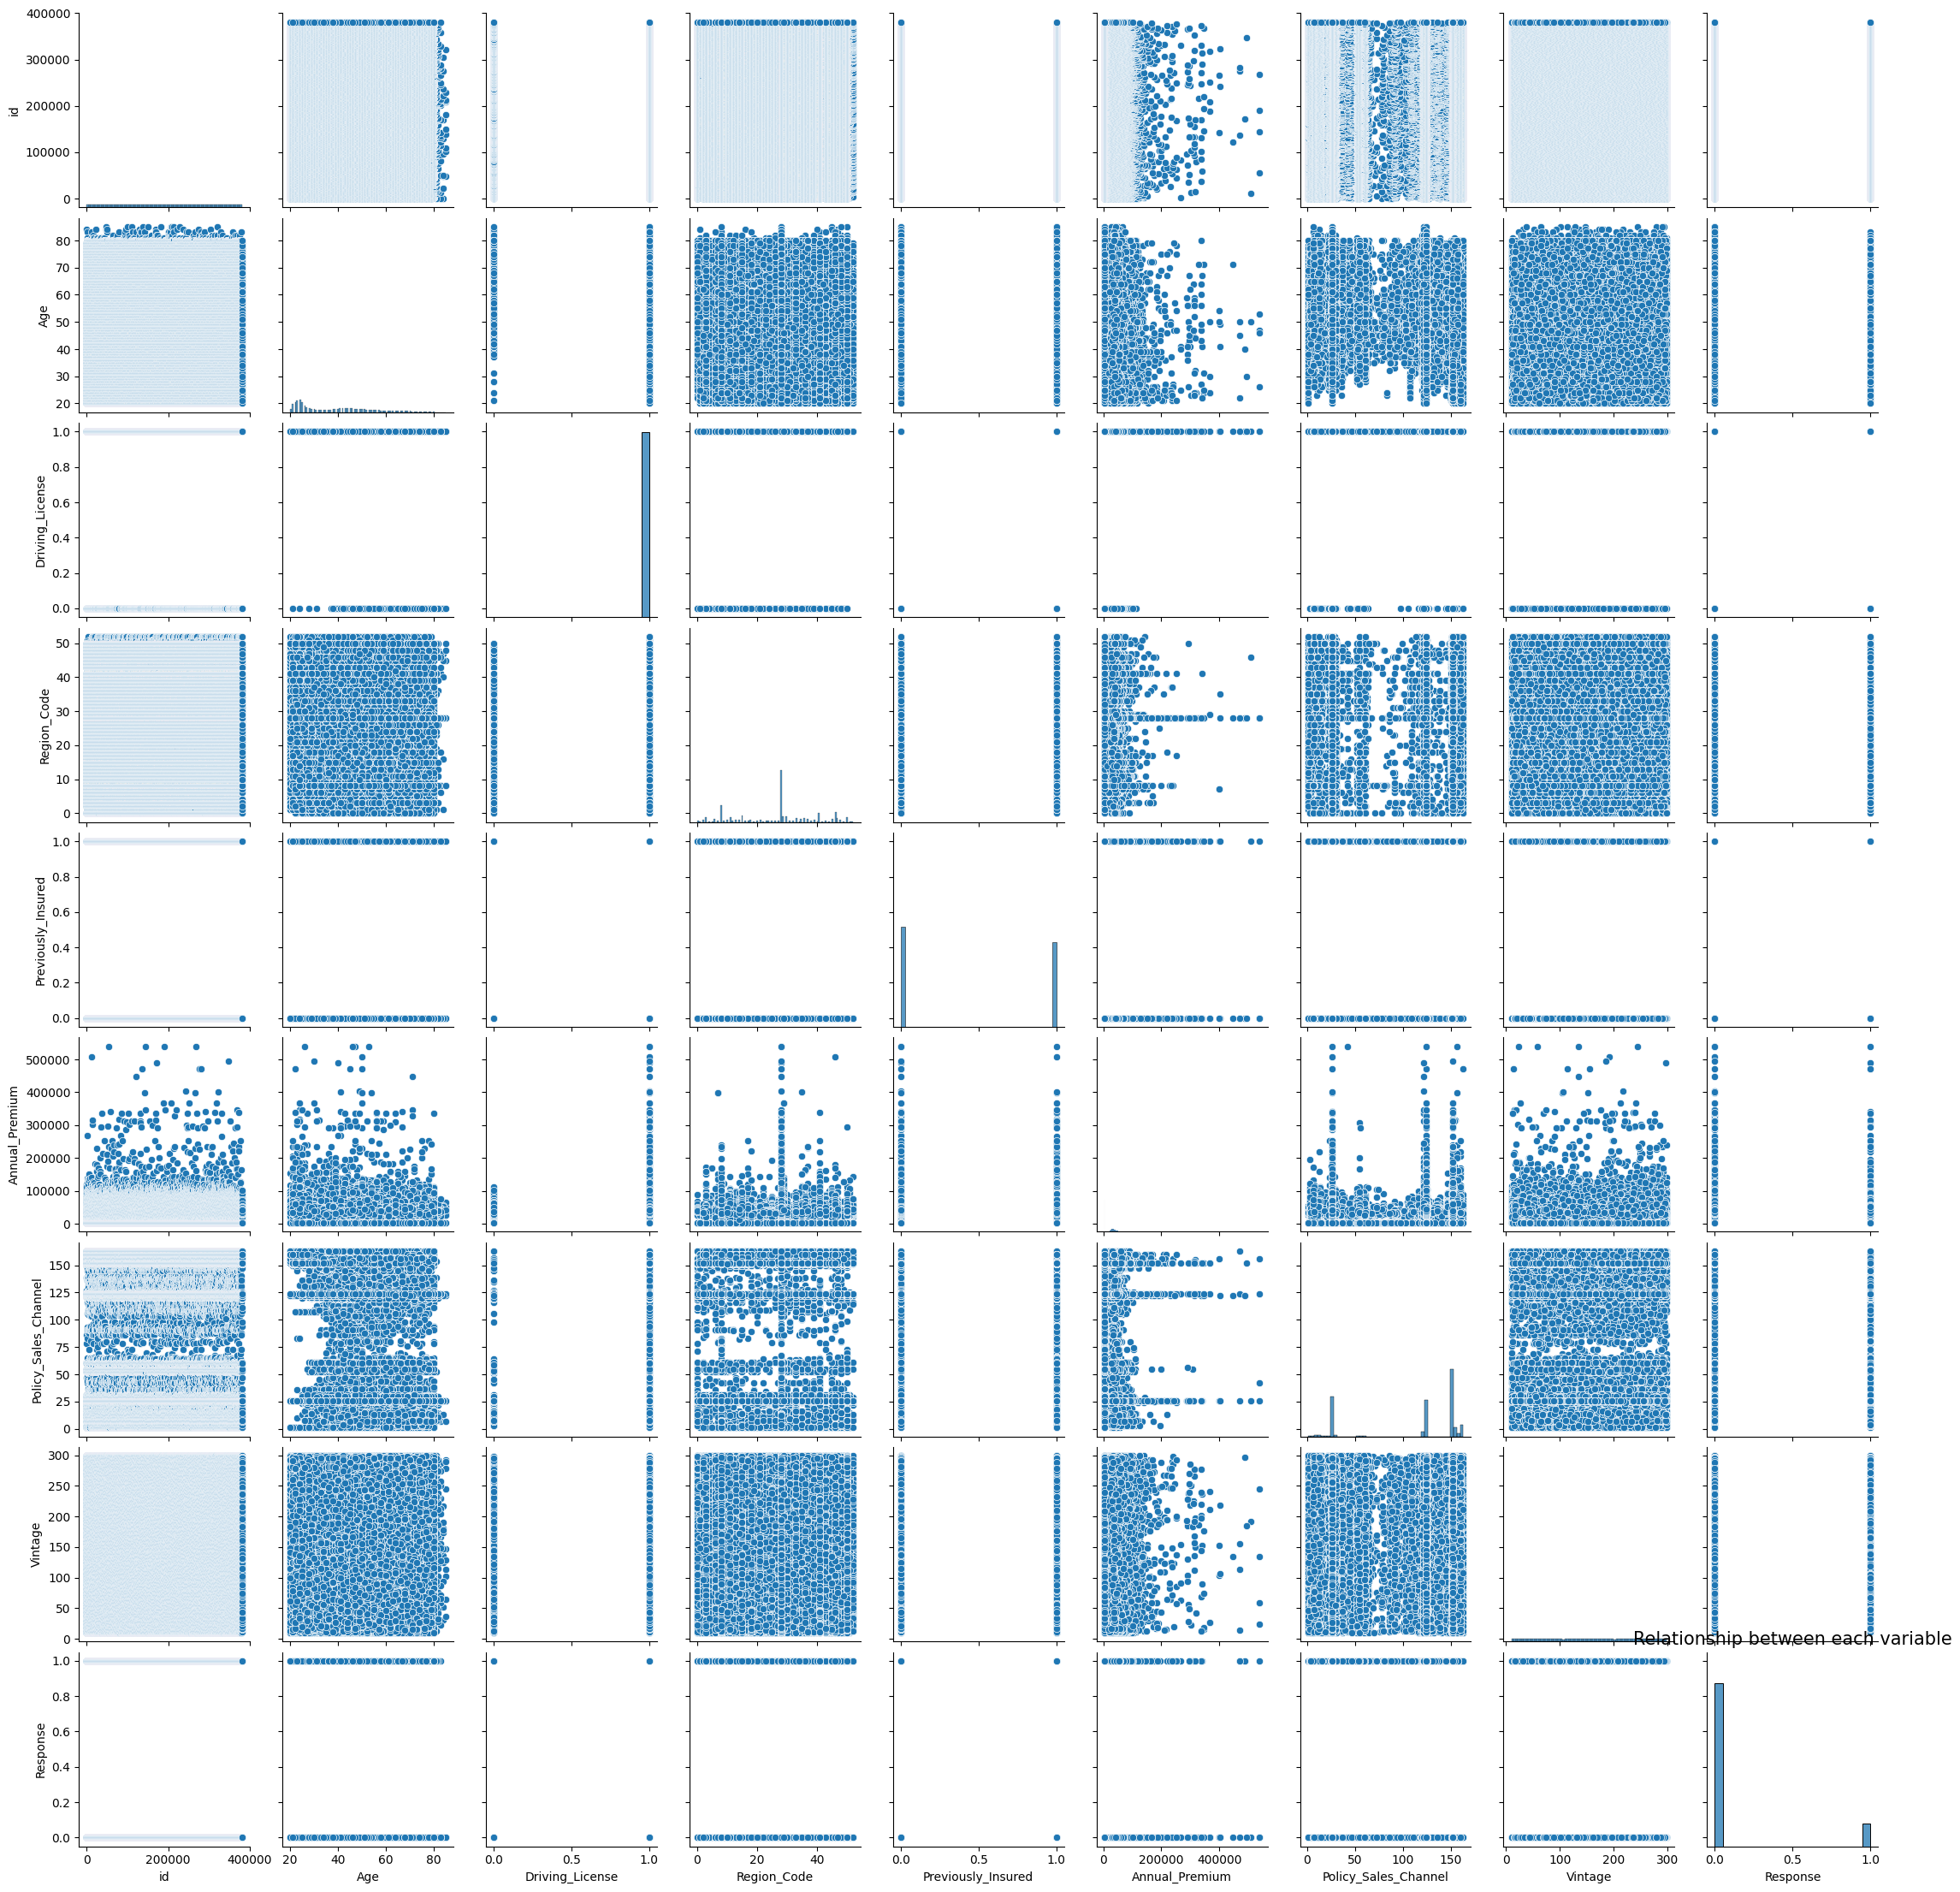

In [18]:
sns.pairplot(data)
plt.title('Relationship between each variable', fontsize=15)

### Observations

Here many features have binary values so we cannot see a good relationship with other features. Due to more unique values some of the features are uniformly distributed. The Annual_Premium feature has a skewed relationship with the other features since it is skewed to the right.

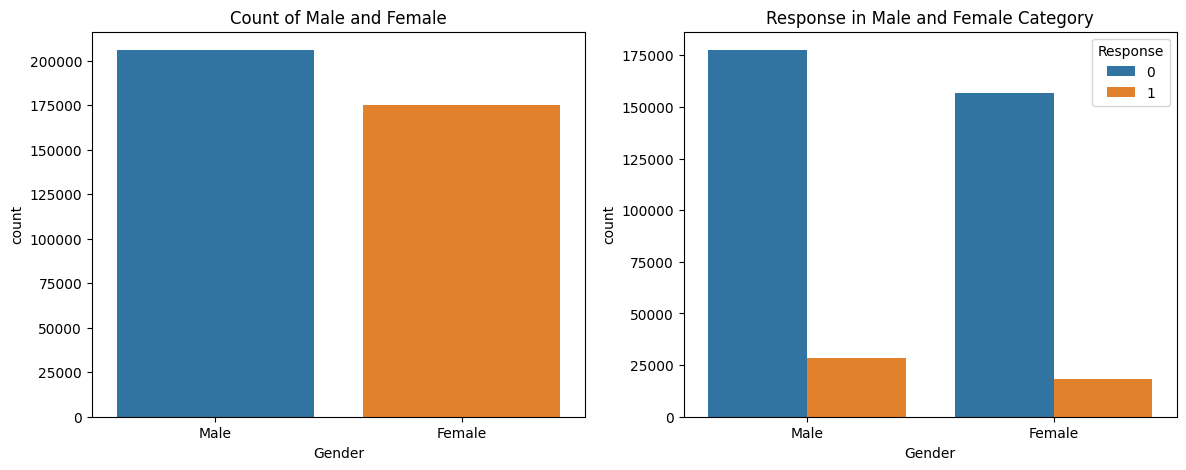

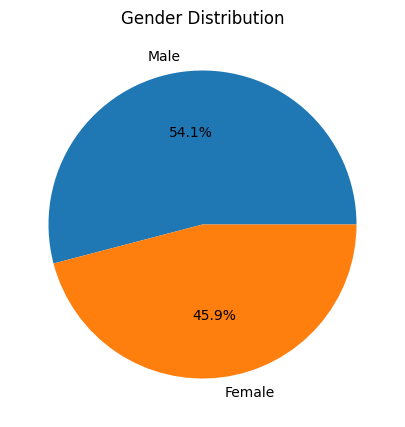

In [19]:
# Create the countplot
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='Gender', data=data)
plt.title('Count of Male and Female')

plt.subplot(1, 2, 2)
sns.countplot(x='Gender', hue='Response', data=data)
plt.title('Response in Male and Female Category')

# Create a pie chart based on gender distribution
plt.figure(figsize=(6, 5))
gender_counts = data['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution')

plt.show()

In [20]:
mean = data.groupby('Gender')['Age'].mean()
print(mean)

Gender
Female    36.372746
Male      40.903095
Name: Age, dtype: float64


### Observations

1. Male buys more insurance than female.
2. The data in column Gender has nearly equivalent distribution
3. The difference between male and female buying insurance is nearly 8.2%

## Analyzing the relationship between Age and Response

Text(0.5, 1.0, 'Response in accordance with Age')

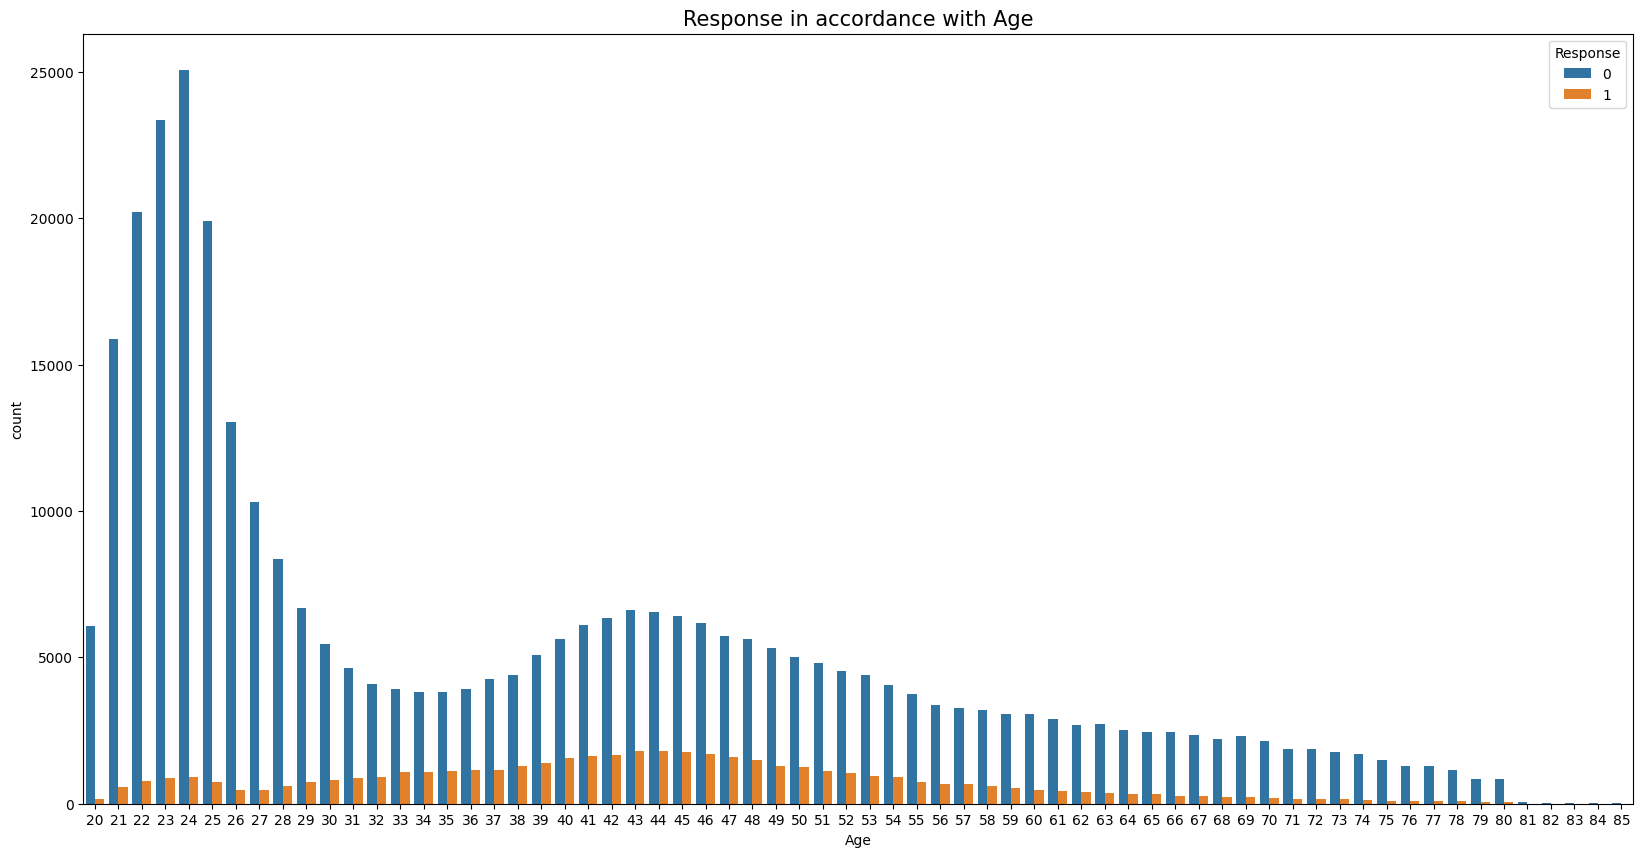

In [21]:
plt.figure(figsize = (20,10))
sns.countplot(x='Age', hue='Response', data=data)
plt.title('Response in accordance with Age', fontsize=15)

## Analyzing the relationship between the columns -----> Age,Response and Gender

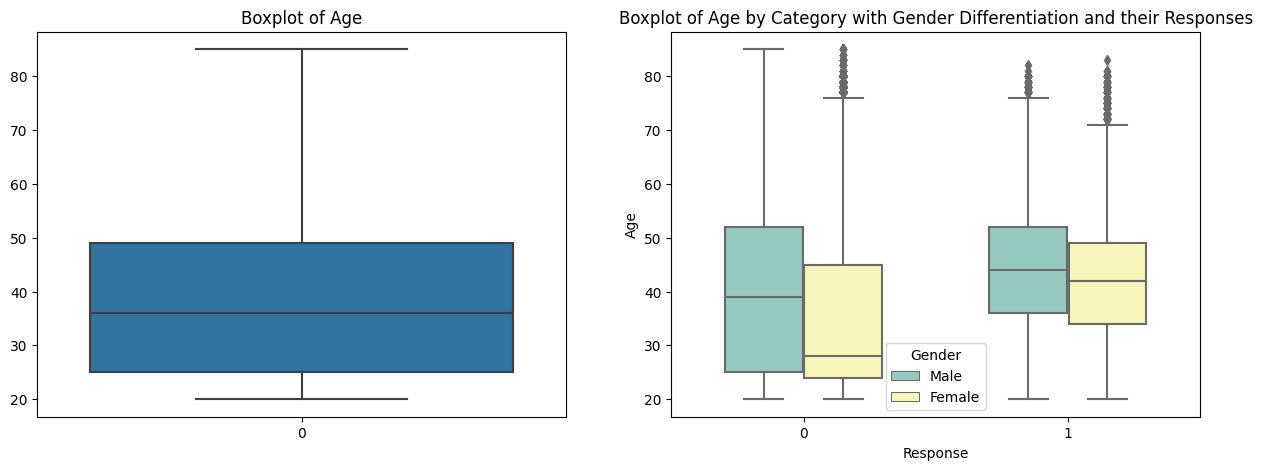

In [22]:
plt.figure(figsize=(15, 5))
# Boxpolt 1
plt.subplot(1, 2, 1)
sns.boxplot(data['Age'])
plt.title('Boxplot of Age')

# Boxplot 2
plt.subplot(1, 2, 2)
sns.boxplot(x='Response', y='Age', hue='Gender', data=data, width=0.6, palette='Set3')
plt.xlabel('Response')
plt.ylabel('Age')
plt.title('Boxplot of Age by Category with Gender Differentiation and their Responses')
plt.legend(title='Gender')
plt.show()


### Observations

1. The boxplot titled 'Boxplot of Age' shows that there are no outliers in the age data column.
2. People who are with most number of insurance lie between the age group of 25-50.
3. For people who were not intrested, the age of Male lies majorly between 25-50 years with median age at 40 years and for Female it lies majorly between 25-45 years with median age at 29 years.
4. For people who were intrested, the age of Male lies majorly between 38-50 years with median age at 45 years and for Female it lies majorly between 35-48 years with median age at 42 years.

## Analyzing the relationship between Driving License and Response

Text(0.5, 1.0, 'Response in terms of Driving License')

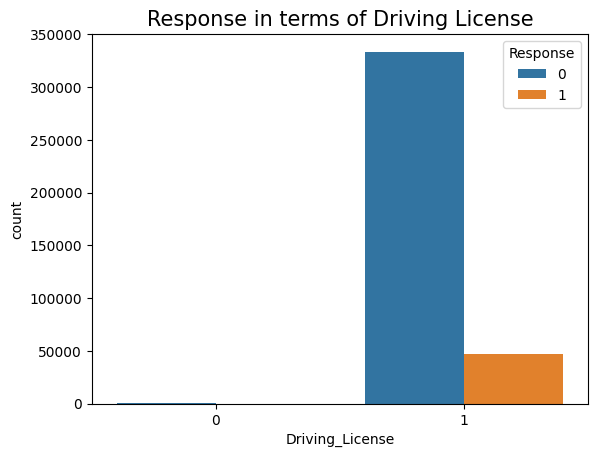

In [23]:
sns.countplot(x ='Driving_License', hue=data['Response'], data=data)
plt.title('Response in terms of Driving License', fontsize = 15)

### Observations

1. Customers who are interested in buying a vehicle insurance already own a Driving License.

## Analyzing relation between Previously Insured vs Response

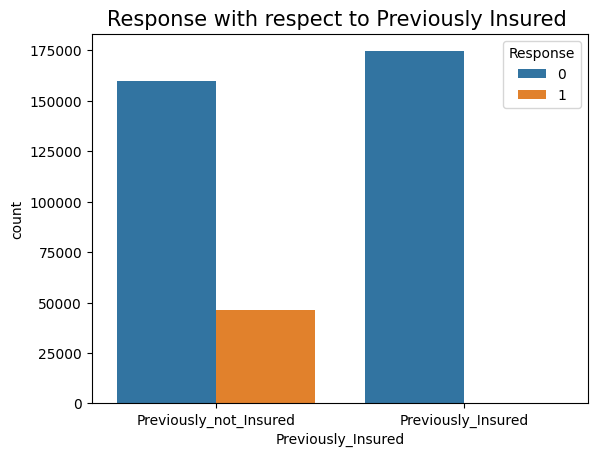

In [24]:
sns.countplot(x="Previously_Insured",hue ="Response",data=data)
plt.title('Response with respect to Previously Insured ', fontsize=15)
ticks = list(range(0, 2, 1))
labels = "Previously_not_Insured Previously_Insured".split()
plt.xticks(ticks, labels);

Let us see the exact count of each Category

In [25]:
counts = data.groupby(['Previously_Insured', 'Response']).size().reset_index(name='Count')
print(counts)

   Previously_Insured  Response   Count
0                   0         0  159929
1                   0         1   46552
2                   1         0  174470
3                   1         1     158


### Observations

1. We have a very low number of people who are Previously Insured and have responded positively for the insurance i.e. 158
2. The count is highest for people who are Previously Insured and have responded negatively i.e. 174470
3. 159929 people are not previously insured and also responded negatively for the insurance
4. Only 46552 people who are not previously insured have responded positively.

## Analyzing relationship between Vehicle age and Response

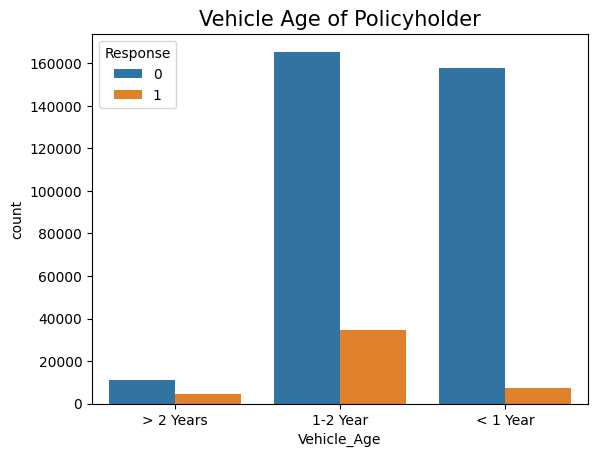

In [26]:
sns.countplot(x=df['Vehicle_Age'], hue ='Response', data=df)
plt.title('Vehicle Age of Policyholder', fontsize=15)
plt.show()

In [27]:
counts = data.groupby(['Vehicle_Age', 'Response']).size().reset_index(name='Count')
print(counts)

  Vehicle_Age  Response   Count
0    1-2 Year         0  165510
1    1-2 Year         1   34806
2    < 1 Year         0  157584
3    < 1 Year         1    7202
4   > 2 Years         0   11305
5   > 2 Years         1    4702


### Observations

1. People with vehicle age 1-2 years have more positive responses than the other two category.
2. People with vehicle age of more than 2 years are more intersted in accordance with number of vehicles owned i.e. nearly 41.6% which is the highest.
3. People with Vehicle age of less than 1 year are least interested i.e. only 4.57%

## Analyzing relationship between Region Code and Response

Text(0.5, 1.0, 'Response in terms of Region_Code')

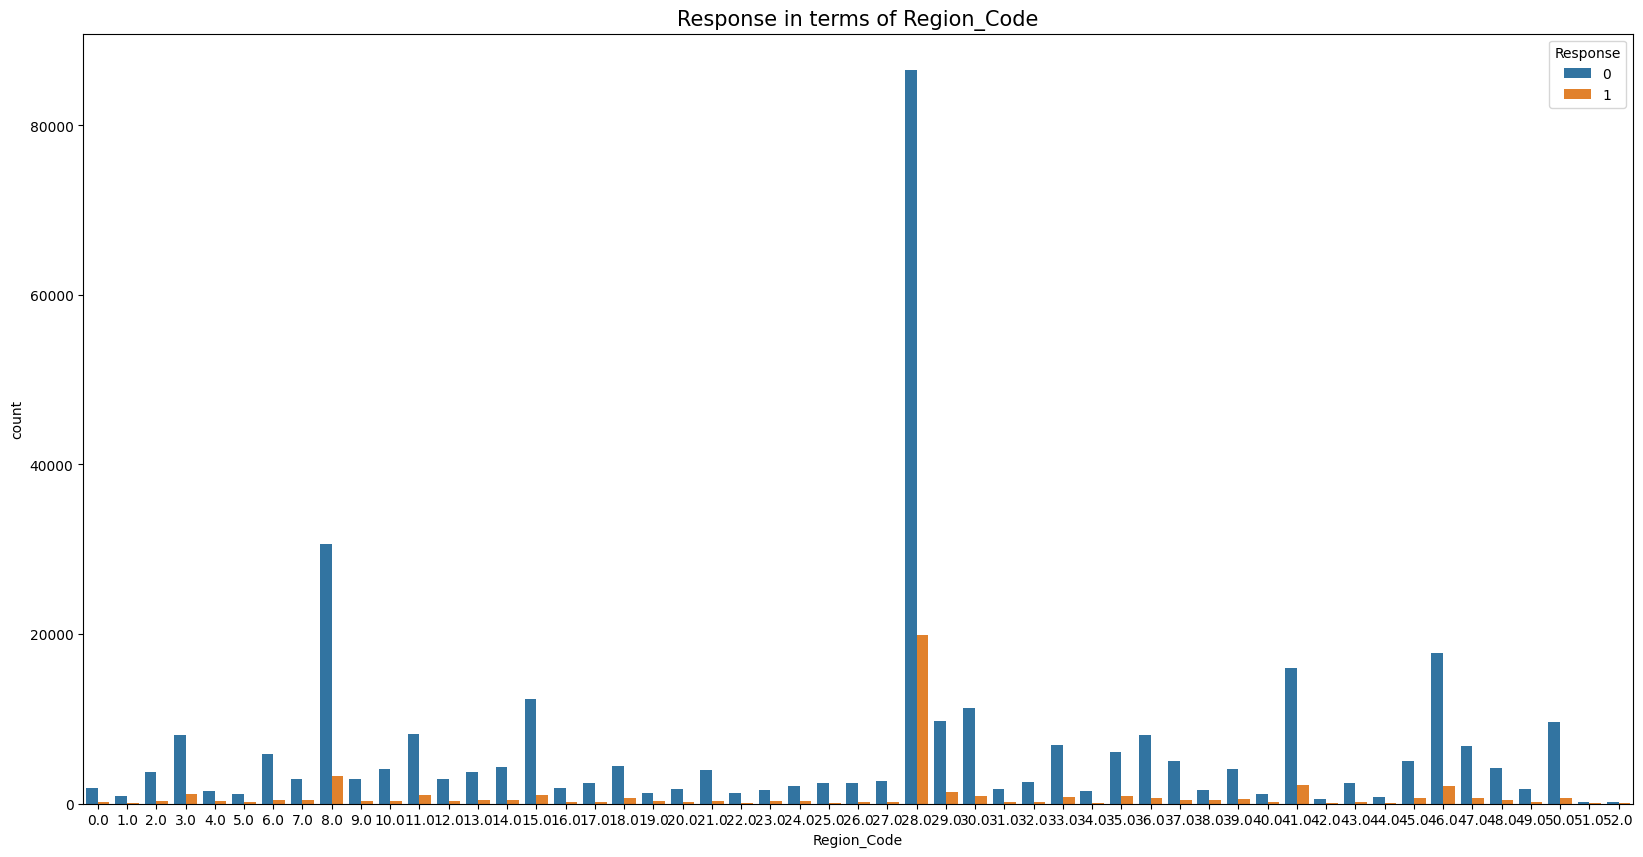

In [28]:
plt.figure(figsize = (20,10))
sns.countplot(x='Region_Code', hue='Response', data=data)
plt.title('Response in terms of Region_Code', fontsize=15)

### Observations

The top 5 region codes with most potential **customers** are
1. 28
2. 08
3. 46
4. 41
5. 15

## Analyzing relation between Vehicle Damage and Response

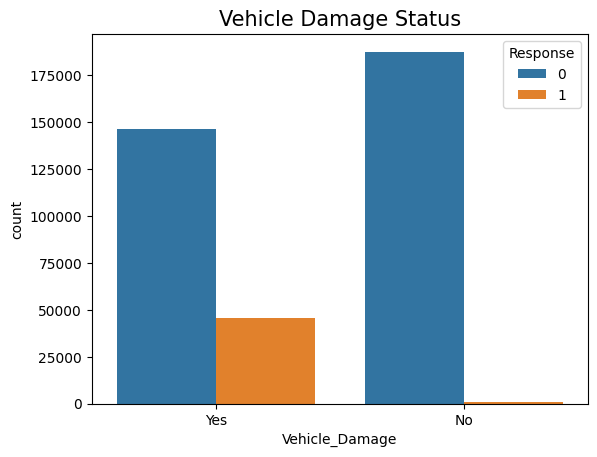

In [29]:
sns.countplot(x=df['Vehicle_Damage'], hue='Response', data=data)
plt.title('Vehicle Damage Status', fontsize=15)
plt.show()

In [30]:
counts = data.groupby(['Vehicle_Damage', 'Response']).size().reset_index(name='Count')
print(counts)

  Vehicle_Damage  Response   Count
0             No         0  187714
1             No         1     982
2            Yes         0  146685
3            Yes         1   45728


### Observations

If the Vehicle is damaged then the customer has a more positive outlook on having an insurance policy i.e. 31.18% rather than an undamaged vehicle i.e. 0.52%

## Let's see the Distribution of different Variables

## Distribution of Target Variables

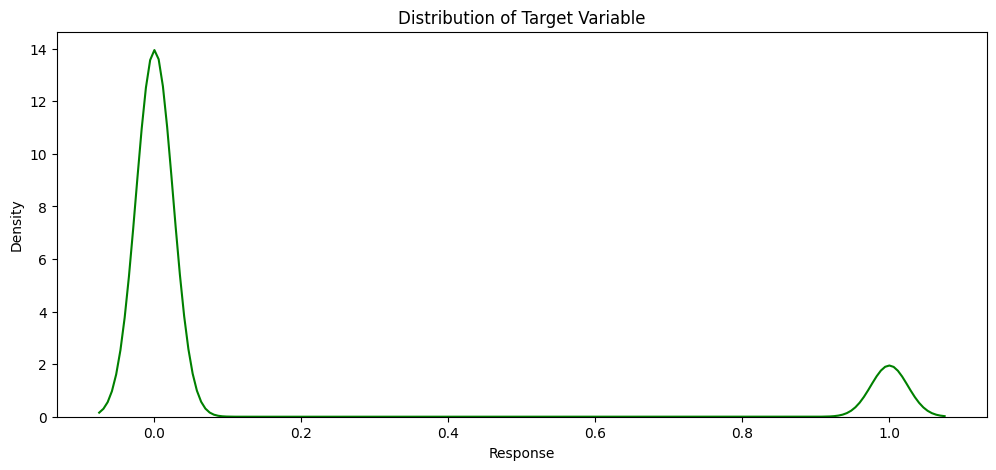

In [31]:
plt.figure(figsize=(12,5))
sns.kdeplot(data['Response'],color='green')
plt.title('Distribution of Target Variable')
plt.show()

## Observation

The target feature has only 2 values 0 and 1

## Frequency distribution of all other Features in data.

<ipython-input-32-0f0f0ebcc4fa>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  pd.DataFrame.hist(data=data,ax=ax)


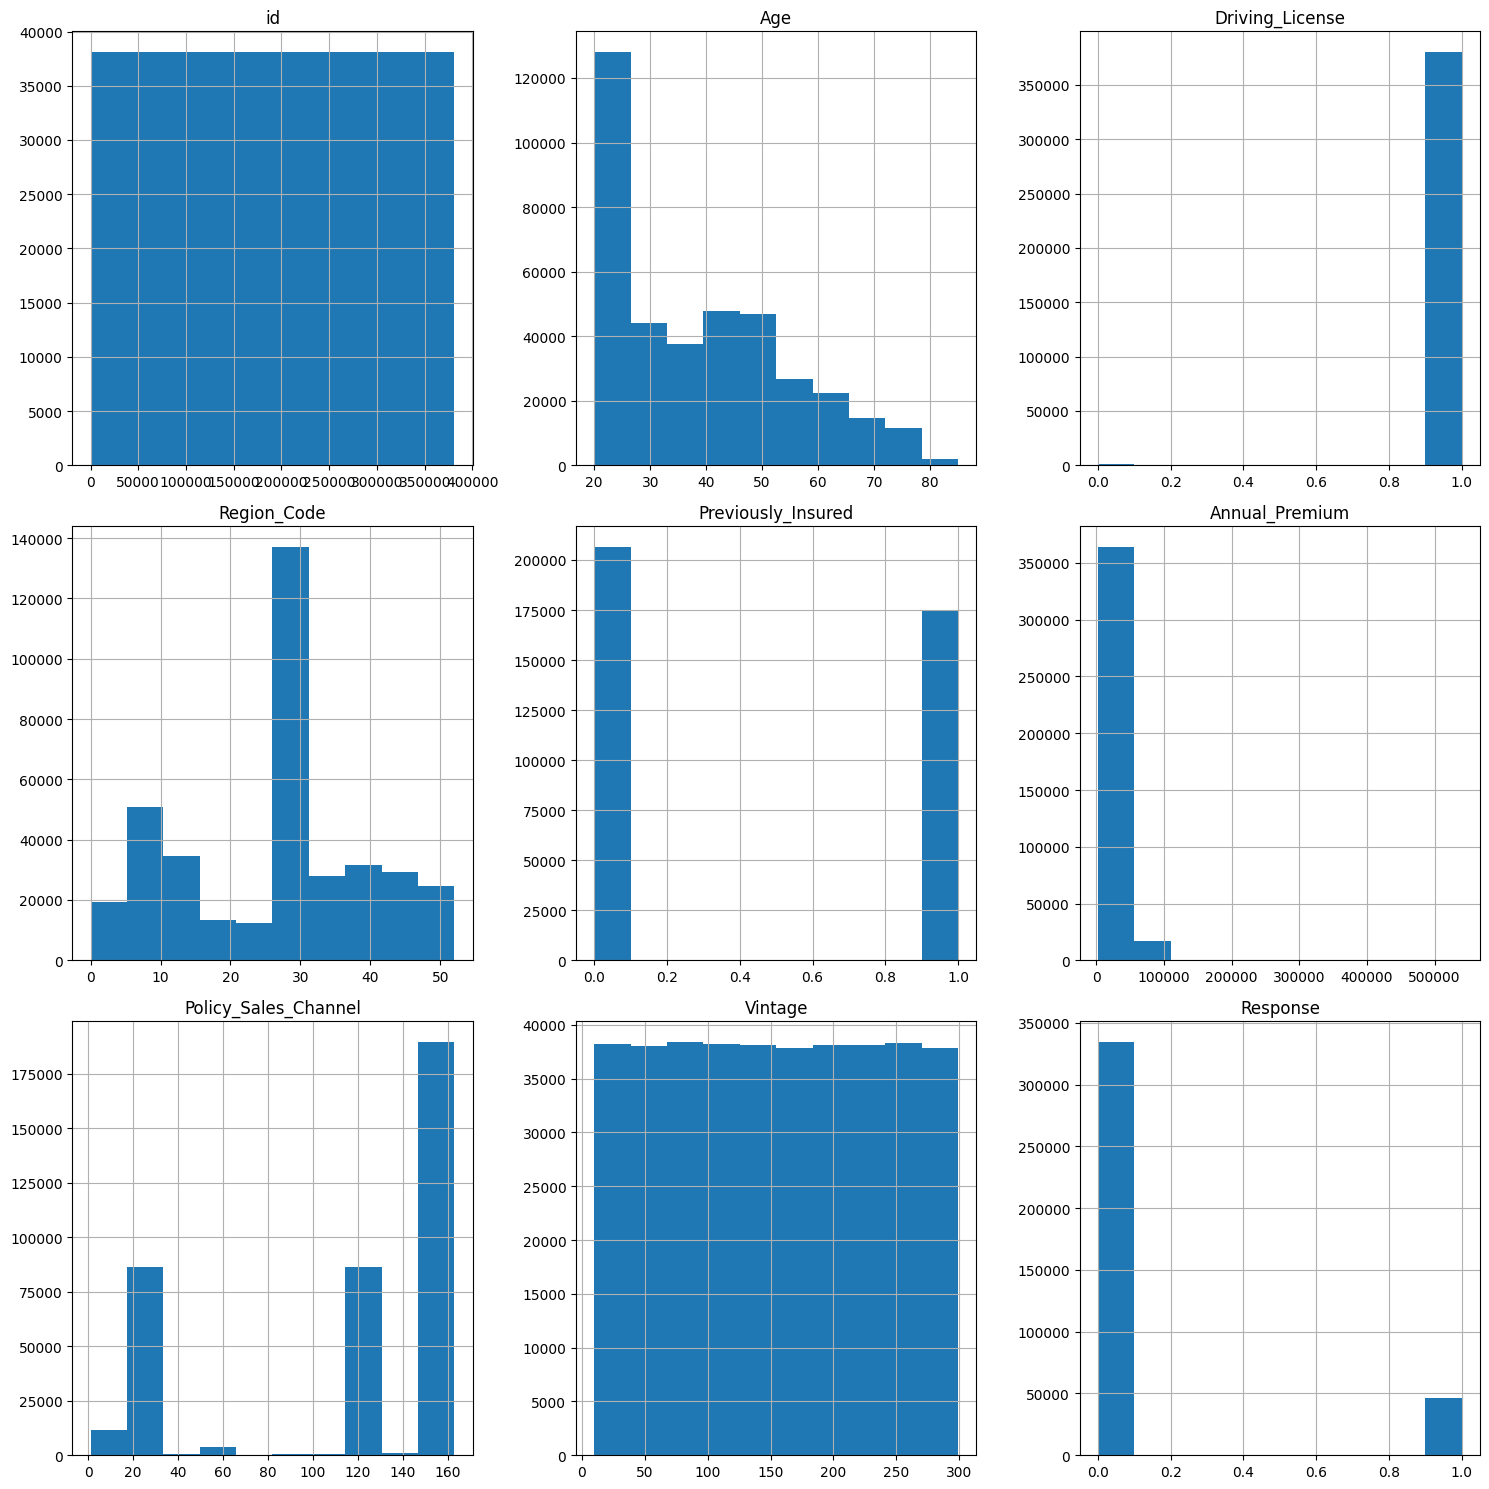

In [32]:
fig, ax = plt.subplots(figsize=(15,15))
pd.DataFrame.hist(data=data,ax=ax)
plt.tight_layout()

### Observations

1. None of the features are distributed normally.

# Feature Selection

## Checking for Outliers in the data

In [33]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()
print(outliers)

<ipython-input-33-7d674acd202a>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = data.quantile(0.25)
<ipython-input-33-7d674acd202a>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = data.quantile(0.75)
<ipython-input-33-7d674acd202a>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()


Age                         0
Annual_Premium          10320
Driving_License           812
Gender                      0
Policy_Sales_Channel        0
Previously_Insured          0
Region_Code                 0
Response                46710
Vehicle_Age                 0
Vehicle_Damage              0
Vintage                     0
id                          0
dtype: int64


### Observations

1. We have found outliers in 3 columns i.e. Annual Premium, Driving License, Response

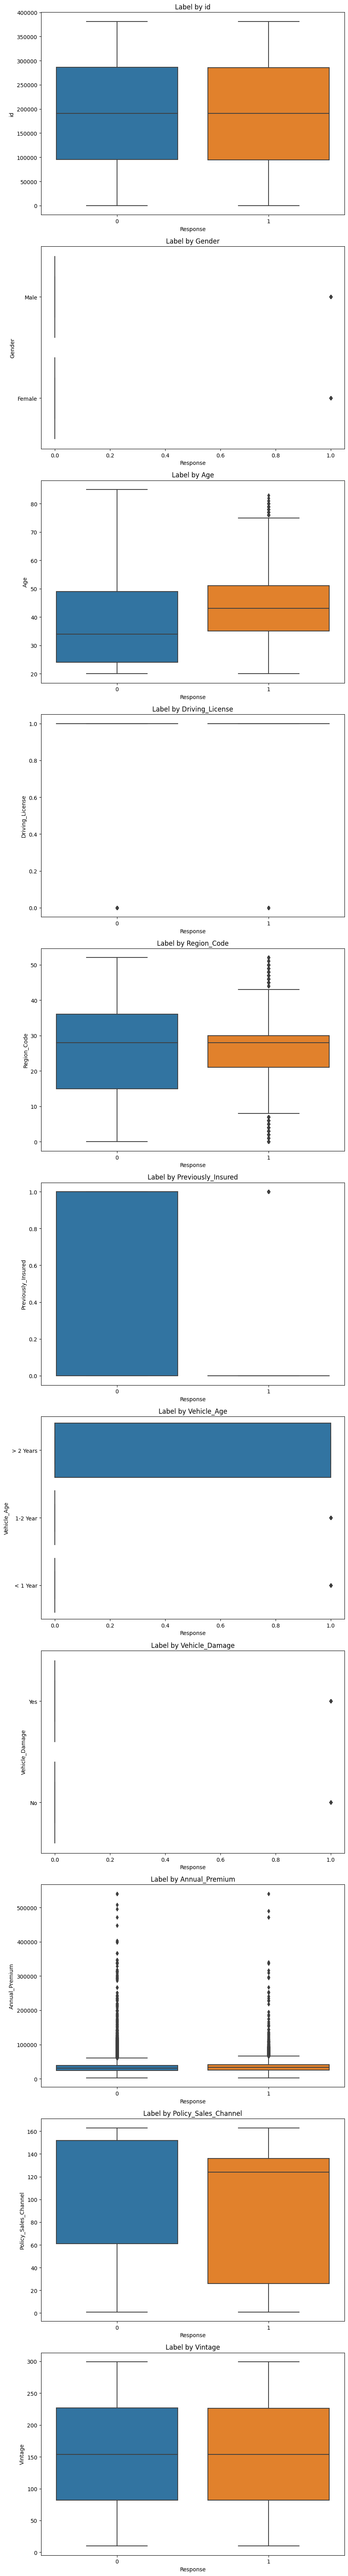

In [34]:
# Select the columns excluding the label column
columns = [col for col in df.columns if col != 'Response']

# Create subplots dynamically based on the number of columns
fig, axes = plt.subplots(nrows=len(columns), figsize=(9, 6 * len(columns)))

# Iterate over each column and plot the boxplot
for i, column in enumerate(columns):
    ax = axes[i] if len(columns) > 1 else axes  # Handle single subplot case
    sns.boxplot(x=df['Response'], y=df[column], ax=ax)
    ax.set_title('Label by ' + column)
    ax.set_xlabel('Response')
    ax.set_ylabel(column)

plt.tight_layout()
plt.show()

## Applying Label Encoding on the Categorical Columns

#### Applying Label Encoding on Vehicle_Age and Vehicle_Damage columns

In [35]:
from sklearn import preprocessing
from sklearn. preprocessing import LabelEncoder

labelEncoder= LabelEncoder()
data['Vehicle_Age'] = labelEncoder.fit_transform(data['Vehicle_Age'])
data['Vehicle_Damage'] = labelEncoder.fit_transform(data['Vehicle_Damage'])

#### Applying One Hot Encoding on Gender Column

In [36]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
enc_data=pd.DataFrame(enc.fit_transform(data[['Gender']]).toarray())
names=enc.get_feature_names_out()
enc_data.columns=names
data_n=data.join(enc_data)

#### Checking the new data frame

In [37]:
data_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  int64  
 7   Vehicle_Damage        381109 non-null  int64  
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
 12  Gender_Female         381109 non-null  float64
 13  Gender_Male           381109 non-null  float64
dtypes: float64(5), int64(8), object(1)
memory usage: 40.

### Observations

1. We now have all the columns numerical format
2. We now have 2 new columns i.e. Gender_Female and Gender_Male

### Removing the feature Gender

In [38]:
data_n.drop('Gender', axis=1, inplace=True)

#### Checking the dataframe

In [39]:
# Shape of dataframe
data_n.shape

(381109, 13)

In [40]:
# Head of dataframe
data_n.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Female,Gender_Male
0,1,44,1,28.0,0,2,1,40454.0,26.0,217,1,0.0,1.0
1,2,76,1,3.0,0,0,0,33536.0,26.0,183,0,0.0,1.0
2,3,47,1,28.0,0,2,1,38294.0,26.0,27,1,0.0,1.0
3,4,21,1,11.0,1,1,0,28619.0,152.0,203,0,0.0,1.0
4,5,29,1,41.0,1,1,0,27496.0,152.0,39,0,1.0,0.0


In [41]:
# Checking for duplicates
duplicate = data_n[data_n.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [id, Age, Driving_License, Region_Code, Previously_Insured, Vehicle_Age, Vehicle_Damage, Annual_Premium, Policy_Sales_Channel, Vintage, Response, Gender_Female, Gender_Male]
Index: []


# Feature Engineering

#### Variance Threshold Removal

This method helps us to check which columns have constant values

In [42]:
# Importing the libraries

from sklearn.feature_selection import VarianceThreshold

In [43]:
# Applying Variance Threshold

variance_threshold = VarianceThreshold(threshold=0)
variance_threshold.fit(data_n)
variance_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

### Observation

1. This indicates that there are no columns with constant values

## F-Classification

In [44]:
#importing the libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [45]:
independent = data_n.drop(['Response'], axis=1) #Contain all independent variables
dependent = data_n['Response'] #Contain Dependent variable

In [46]:
#Finding scores of individual feature
f_scores = f_classif(independent, dependent)
f_scores

(array([7.13370735e-01, 4.76694479e+03, 3.93066928e+01, 4.25827356e+01,
        5.02033540e+04, 4.17348459e+03, 5.47422454e+04, 1.94317587e+02,
        7.51301151e+03, 4.20468707e-01, 1.05091307e+03, 1.05091307e+03]),
 array([3.98327606e-001, 0.00000000e+000, 3.62583444e-010, 6.78391651e-011,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 3.72231514e-044,
        0.00000000e+000, 5.16703652e-001, 3.18074235e-230, 3.18074235e-230]))

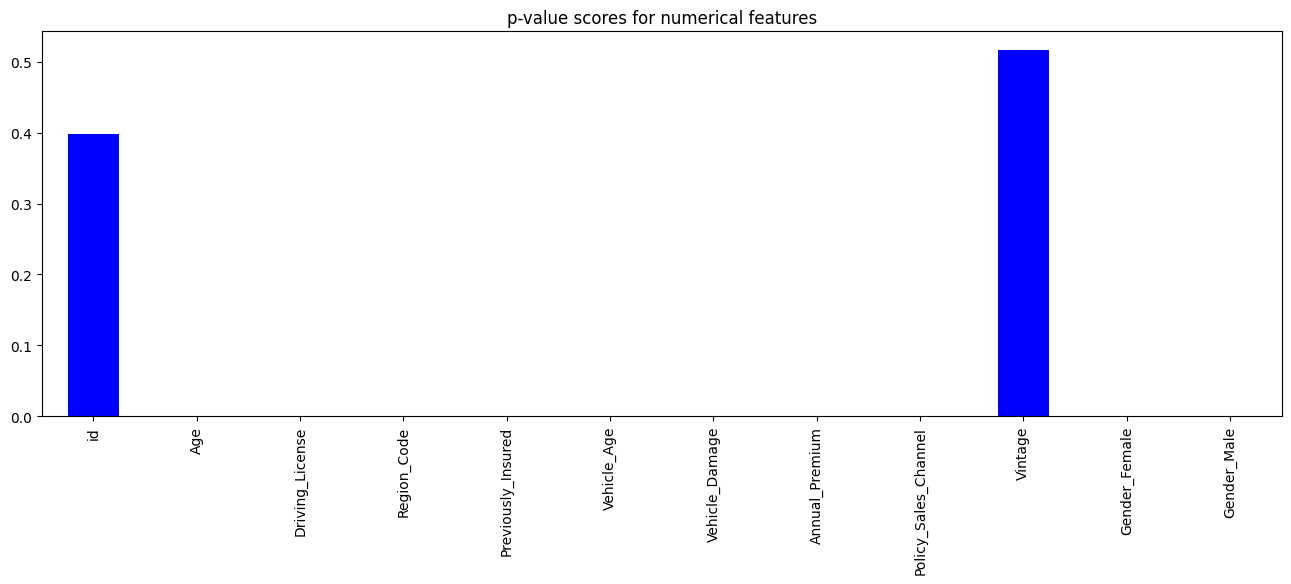

In [47]:
#The Second array has required p-values.
p_values = pd.Series(f_scores[1], index= independent.columns)
p_values.plot(kind='bar', color='blue', figsize=(16,5))
plt.title('p-value scores for numerical features')
plt.show()

### Observations

1. P-values of columns Id and Vintage are 0.4 and 0.5 respectively, so we can drop them

## Feature Importance

#### Using RandomForestClassifier to find Features Importance

<Axes: >

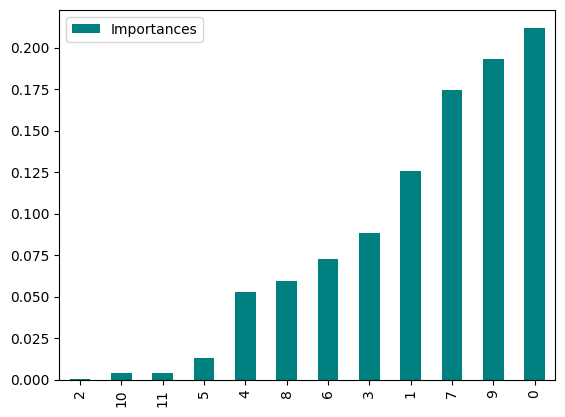

In [48]:
# Importing the libraries

from sklearn.ensemble import RandomForestClassifier
# Create the random forest with hyperparameters
model= RandomForestClassifier(n_estimators=340)
# Fit the mmodel
model.fit(independent,dependent)
# get the importance of thr resulting features
importances= model.feature_importances_
# Create a data frame for visualization
final_df= pd.DataFrame({"Features": pd.DataFrame(independent).columns, "Importances": importances})
final_df.set_index('Importances')
# Sort in ascending order to better visualization
final_df= final_df.sort_values('Importances')
# Plot the feature importances in bars
final_df.plot.bar(color='teal')


### Observations

1. So after doing F_Classifier and RandomForestClassifier we can observe that id,vintage are the columns that can be dropped.

In [49]:
data_n.drop(['id','Vintage'],axis=1,inplace=True)

## Selecting Co-relation Features using Heatmap

Text(0.5, 1.05, 'Pearson correlation of Features')

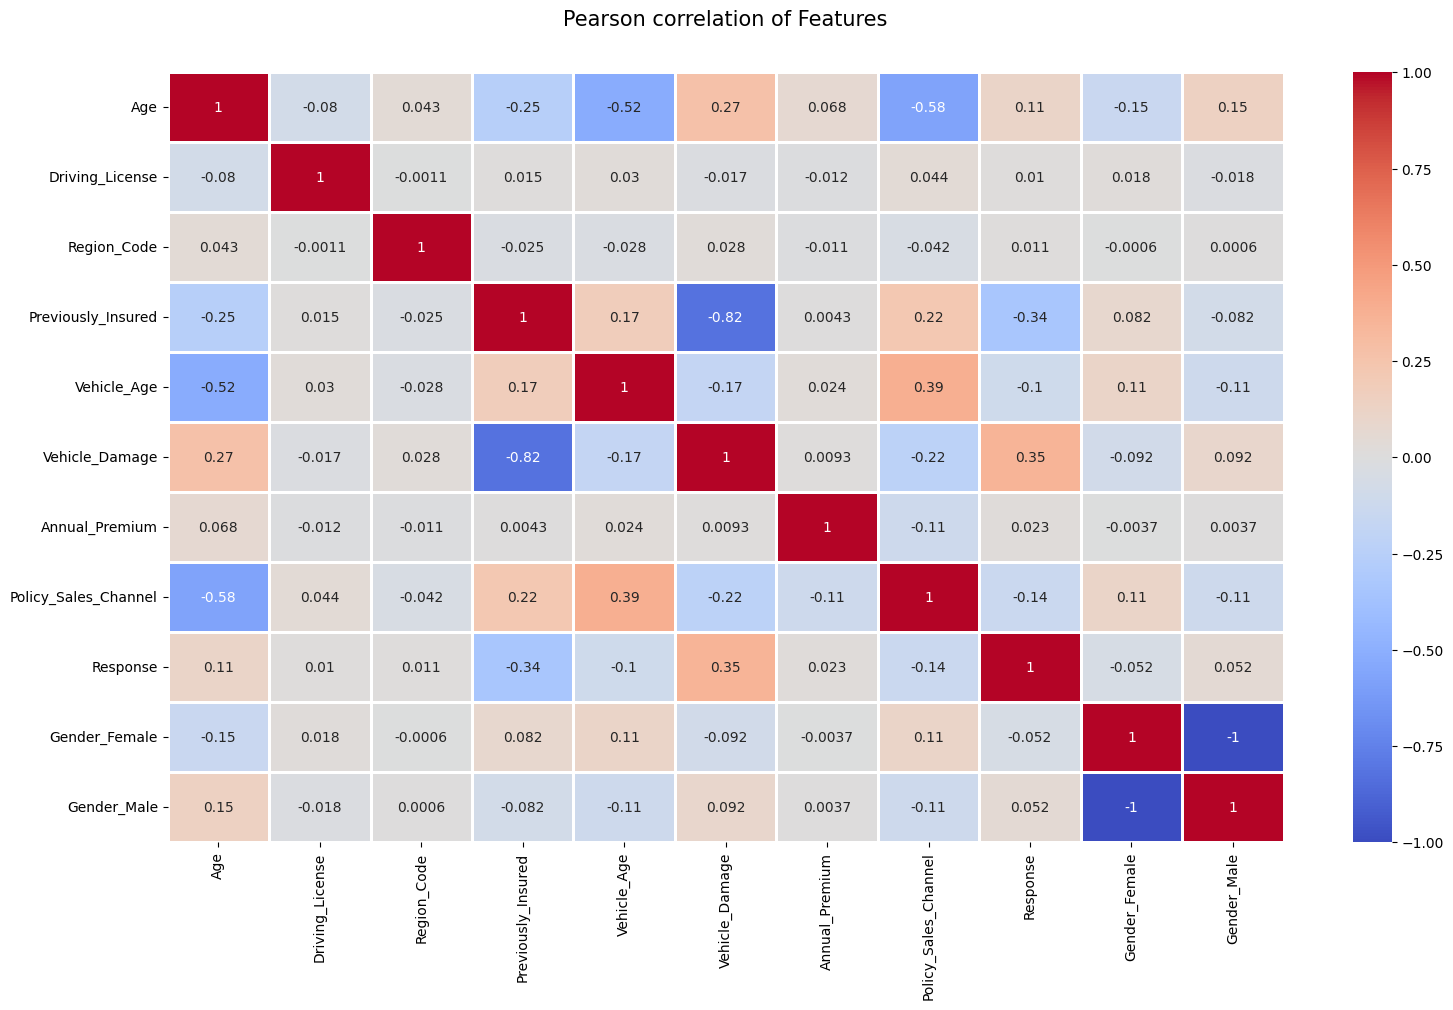

In [50]:
#Checking correlation of all the columns using heatmap
plt.figure(figsize = (18,10))
correlation = data_n.corr()
sns.heatmap(correlation, annot= True,linewidths=1,cmap='coolwarm')
plt.title("Pearson correlation of Features", y=1.05, size=15)

### Observations

1. Gender_Female and Gender_Male have a very high co-relation i.e. multicolinearity.
2. Previous Insured have high negative co-relation i.e. -0.34 and Vehicle Damage have high positive co-relation i.e. 0.35.

#### Dropping the column Gender_Female

In [51]:
data_n.drop('Gender_Female',axis=1,inplace=True)

In [52]:
# Checking the shape

data_n.shape

(381109, 10)

# Train-Test Split

## Split Train and Test Dataset

In [53]:
X = data_n.drop(['Response'], axis=1) #Contain all independent variables
y = data_n['Response']

In [54]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=.30,random_state=0)
print(Xtrain.shape,Xtest.shape,ytrain.shape,ytest.shape)

(266776, 9) (114333, 9) (266776,) (114333,)


In [55]:
# Listing out our features
train_col_list = list(Xtrain.columns)
train_col_list

['Age',
 'Driving_License',
 'Region_Code',
 'Previously_Insured',
 'Vehicle_Age',
 'Vehicle_Damage',
 'Annual_Premium',
 'Policy_Sales_Channel',
 'Gender_Male']

In [56]:
ytrain = ytrain.values.reshape(-1,1)

In [57]:
ytest = ytest.values.reshape(-1,1)

In [58]:
ytrain.shape

(266776, 1)

In [59]:
ytest.shape

(114333, 1)

## Handling of Imbalanced Data

One of the most significant challenges when dealing with unbalanced datasets is the metrics used to evaluate their model. Using simpler metrics, such as accuracy score, can be misleading. In a dataset with highly unbalanced classes, the classifier will always "predict" the most common class without performing any feature analysis, and while it will have a high accuracy rate, it will often be incorrect.

### Applying Oversampling Methods

In [60]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state = 42)
X_ros, y_ros = ros.fit_resample(Xtrain, ytrain)

print('Original dataset shape', len(data))
print('Resampled dataset shape', len(y_ros))
print('Resampled dataset shape', len(X_ros))
print('Resampled dataset shape', len(ytrain))
print('Resampled dataset shape', len(Xtrain))

Original dataset shape 381109
Resampled dataset shape 468316
Resampled dataset shape 468316
Resampled dataset shape 266776
Resampled dataset shape 266776


### Observations

After applying Oversampling Methods we now have a more balanced data and this can now been used for training the model.

## Feature Scaling

In [61]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_ros = scaler.fit_transform(X_ros)
Xtest = scaler.transform(Xtest)

Scaling Down the train variable makes it easier for a model to learn.

# Model Training

In [62]:
#Defining all the required models
models = [
           ['LinearClassifier: ', Perceptron()],
           ['LogisticRegresseer:', LogisticRegression()],
           ['GNB: ', GaussianNB()],
           ['BNB: ', BernoulliNB()],
           ['KNeighborsClassifier: ', KNeighborsClassifier()],
           ['DecisionTreeClassifier: ', DecisionTreeClassifier()],
           ['RandomForestClassifier ',RandomForestClassifier()],
           ['GradientBoostingClassifier: ', GradientBoostingClassifier()] ,
           ['XGBRFClassifier: ', XGBRFClassifier()],
           ['AdaBoostClassifier: ',AdaBoostClassifier()],
           ['LgbmClassifier: ',ltb.LGBMClassifier()]
         ]

In [63]:
#store all the metrics values in data frame
model_data = []
for name,curr_model in models :
      curr_model_data = {}
      curr_model.random_state = 42
      curr_model_data["Name"] = name
      start = time.time()
      curr_model.fit(X_ros,y_ros)
      end = time.time()
      y_train_pred=curr_model.predict(X_ros)
      y_test_pred= curr_model.predict(Xtest)
      curr_model_data["Train_Time"] = end - start
      curr_model_data["Train accuracy"] =accuracy_score(y_ros,y_train_pred )
      curr_model_data["Test accuracy"] =accuracy_score(ytest, y_test_pred)
      curr_model_data["Train precision"] = precision_score(y_ros,y_train_pred)
      curr_model_data["Test precision"] = precision_score(ytest,y_test_pred)
      curr_model_data["Train recall"] = recall_score(y_ros,y_train_pred)
      curr_model_data["Test recall"] = recall_score(ytest,y_test_pred)
      curr_model_data["Train f1 score"] = f1_score(y_ros,y_train_pred)
      curr_model_data["Test f1 score"] = f1_score(ytest,y_test_pred)
      curr_model_data['Train ROC-AUC'] = roc_auc_score(y_ros,y_train_pred)
      curr_model_data["Test ROC-AUC"] = roc_auc_score(ytest,y_test_pred)
      model_data.append(curr_model_data)

In [64]:
results = pd.DataFrame(model_data)
results

,Name,Train_Time,Train accuracy,Test accuracy,Train precision,Test precision,Train recall,Test recall,Train f1 score,Test f1 score,Train ROC-AUC,Test ROC-AUC
0,LinearClassifier:,0.748076,0.757691,0.664734,0.707163,0.253378,0.879645,0.883622,0.784030,0.393826,0.757691,0.758792
1,LogisticRegresseer:,2.254109,0.784026,0.638722,0.705400,0.251498,0.975423,0.977221,0.818722,0.400041,0.784026,0.784178
2,GNB:,0.109324,0.784022,0.638713,0.705396,0.251493,0.975423,0.977221,0.818719,0.400035,0.784022,0.784173
3,BNB:,0.145967,0.786640,0.645063,0.708572,0.254691,0.973787,0.975802,0.820275,0.403948,0.786640,0.787185
4,KNeighborsClassifier:,1.021471,0.903740,0.766629,0.860280,0.286320,0.964054,0.598567,0.909216,0.387353,0.903740,0.694411
5,DecisionTreeClassifier:,2.304218,0.988540,0.820970,0.979439,0.294516,0.998031,0.324297,0.988648,0.308690,0.988540,0.607545
6,RandomForestClassifier,80.188469,0.988527,0.825212,0.978984,0.307778,0.998488,0.334729,0.988640,0.320688,0.988527,0.614447
7,GradientBoostingClassifier:,61.013609,0.798079,0.701276,0.738096,0.282578,0.924043,0.925135,0.820668,0.432922,0.798079,0.797470
8,XGBRFClassifier:,38.878978,0.795322,0.694375,0.733783,0.278355,0.926938,0.929109,0.819128,0.428373,0.795322,0.795242
9,AdaBoostClassifier:,18.612185,0.796545,0.688917,0.731119,0.275971,0.938089,0.938618,0.821772,0.426533,0.796545,0.796216


### Observations

Analyzing the test result of all models we get that Recall is the best performing evaluation metric and among algorithms Boosting Algorithms are the best performing.

### Plotting the results for model metrics

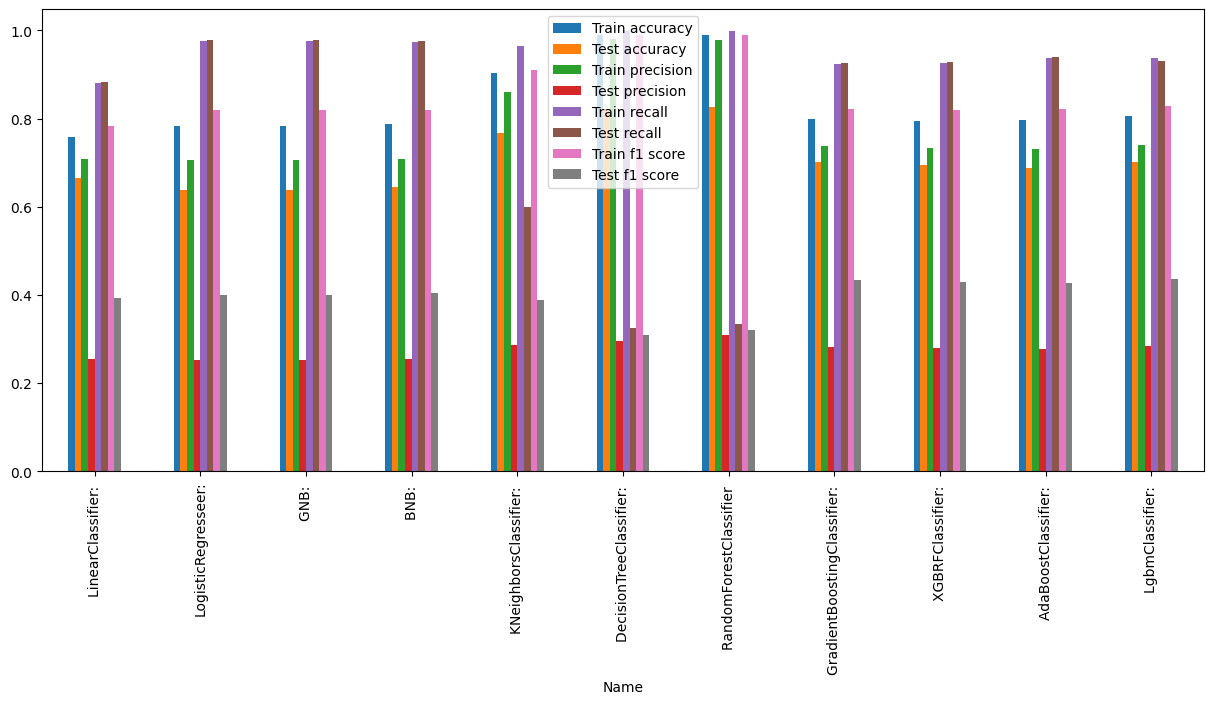

In [65]:
results.plot(x="Name", y=['Train accuracy', 'Test accuracy', 'Train precision', 'Test precision', 'Train recall', 'Test recall', 'Train f1 score', 'Test f1 score'], kind='bar', figsize=(15, 6))
plt.show()


### Observations

**RandomForestClassifier seems to be the best performer in terms of accuracy**.

## For better understanding let's see the Confusion Matrix

In [66]:
model_data2 = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 42
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(X_ros,y_ros)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["conf_mat"] = confusion_matrix(ytest,[round(value) for value in (curr_model.predict(Xtest))])
    model_data2.append(curr_model_data)


In [67]:
Conf_Mat_df= pd.DataFrame(model_data2)
Conf_Mat_df

,Name,Train_Time,conf_mat
0,LinearClassifier:,0.974530,"[[63549, 36692], [1640, 12452]]"
1,LogisticRegresseer:,2.271413,"[[59256, 40985], [321, 13771]]"
2,GNB:,0.127656,"[[59255, 40986], [321, 13771]]"
3,BNB:,0.175375,"[[60001, 40240], [341, 13751]]"
4,KNeighborsClassifier:,1.132203,"[[79216, 21025], [5657, 8435]]"
5,DecisionTreeClassifier:,2.287909,"[[89294, 10947], [9522, 4570]]"
6,RandomForestClassifier,79.161104,"[[89632, 10609], [9375, 4717]]"
7,GradientBoostingClassifier:,60.692175,"[[67142, 33099], [1055, 13037]]"
8,XGBRFClassifier:,38.383430,"[[66297, 33944], [999, 13093]]"
9,AdaBoostClassifier:,15.853477,"[[65539, 34702], [865, 13227]]"


### Observation

The Confusion Matrix shows that RandomForestClassifier is the best performing models.

# Hyper Parameter Tuning and Cross-Validation

## Hyper Parameter tuning on RandomForestClassifier

In [68]:
rf = RandomForestClassifier(random_state=40)
#Cross validation and hyperparameter tuning
rf_bayes = BayesSearchCV(estimator= rf,
                         search_spaces = {
                          'max_depth': Integer(2,100),
                          'min_samples_leaf': Integer(1,100),
                          'min_samples_split': Integer(2,100),
                          'n_estimators': Integer(1,140),
                          'max_features': ["auto", "sqrt", "log2"]
                        },
                       cv = 5, verbose=2, scoring='accuracy',n_iter=10)

rf_bayes.fit(X_ros,y_ros)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=81, max_features=log2, min_samples_leaf=40, min_samples_split=37, n_estimators=86; total time=  41.8s
[CV] END max_depth=81, max_features=log2, min_samples_leaf=40, min_samples_split=37, n_estimators=86; total time=  43.4s
[CV] END max_depth=81, max_features=log2, min_samples_leaf=40, min_samples_split=37, n_estimators=86; total time=  42.3s
[CV] END max_depth=81, max_features=log2, min_samples_leaf=40, min_samples_split=37, n_estimators=86; total time=  41.8s
[CV] END max_depth=81, max_features=log2, min_samples_leaf=40, min_samples_split=37, n_estimators=86; total time=  42.6s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=89, max_features=log2, min_samples_leaf=80, min_samples_split=12, n_estimators=11; total time=   5.9s
[CV] END max_depth=89, max_features=log2, min_samples_leaf=80, min_samples_split=12, n_estimators=11; total time=   5.1s
[CV] END max_depth=89, max_features

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=16, max_features=auto, min_samples_leaf=78, min_samples_split=61, n_estimators=66; total time=  30.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=16, max_features=auto, min_samples_leaf=78, min_samples_split=61, n_estimators=66; total time=  29.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=16, max_features=auto, min_samples_leaf=78, min_samples_split=61, n_estimators=66; total time=  29.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=16, max_features=auto, min_samples_leaf=78, min_samples_split=61, n_estimators=66; total time=  29.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=16, max_features=auto, min_samples_leaf=78, min_samples_split=61, n_estimators=66; total time=  28.8s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=68, max_features=sqrt, min_samples_leaf=45, min_samples_split=20, n_estimators=83; total time=  39.8s
[CV] END max_depth=68, max_features=sqrt, min_samples_leaf=45, min_samples_split=20, n_estimators=83; total time=  40.5s
[CV] END max_depth=68, max_features=sqrt, min_samples_leaf=45, min_samples_split=20, n_estimators=83; total time=  39.0s
[CV] END max_depth=68, max_features=sqrt, min_samples_leaf=45, min_samples_split=20, n_estimators=83; total time=  39.8s
[CV] END max_depth=68, max_features=sqrt, min_samples_leaf=45, min_samples_split=20, n_estimators=83; total time=  49.7s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=75, max_features=auto, min_samples_leaf=28, min_samples_split=43, n_estimators=14; total time=   6.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=75, max_features=auto, min_samples_leaf=28, min_samples_split=43, n_estimators=14; total time=   8.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=75, max_features=auto, min_samples_leaf=28, min_samples_split=43, n_estimators=14; total time=   6.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=75, max_features=auto, min_samples_leaf=28, min_samples_split=43, n_estimators=14; total time=   7.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=75, max_features=auto, min_samples_leaf=28, min_samples_split=43, n_estimators=14; total time=   6.6s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=88, max_features=auto, min_samples_leaf=33, min_samples_split=7, n_estimators=120; total time=  58.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=88, max_features=auto, min_samples_leaf=33, min_samples_split=7, n_estimators=120; total time=  59.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=88, max_features=auto, min_samples_leaf=33, min_samples_split=7, n_estimators=120; total time=  58.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=88, max_features=auto, min_samples_leaf=33, min_samples_split=7, n_estimators=120; total time=  58.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=88, max_features=auto, min_samples_leaf=33, min_samples_split=7, n_estimators=120; total time=  58.9s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=91, max_features=log2, min_samples_leaf=94, min_samples_split=31, n_estimators=100; total time=  46.6s
[CV] END max_depth=91, max_features=log2, min_samples_leaf=94, min_samples_split=31, n_estimators=100; total time=  47.2s
[CV] END max_depth=91, max_features=log2, min_samples_leaf=94, min_samples_split=31, n_estimators=100; total time=  45.4s
[CV] END max_depth=91, max_features=log2, min_samples_leaf=94, min_samples_split=31, n_estimators=100; total time=  44.7s
[CV] END max_depth=91, max_features=log2, min_samples_leaf=94, min_samples_split=31, n_estimators=100; total time=  47.4s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=54, max_features=sqrt, min_samples_leaf=37, min_samples_split=18, n_estimators=77; total time=  36.9s
[CV] END max_depth=54, max_fea

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=53, max_features=auto, min_samples_leaf=49, min_samples_split=28, n_estimators=87; total time=  41.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=53, max_features=auto, min_samples_leaf=49, min_samples_split=28, n_estimators=87; total time=  41.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=53, max_features=auto, min_samples_leaf=49, min_samples_split=28, n_estimators=87; total time=  43.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=53, max_features=auto, min_samples_leaf=49, min_samples_split=28, n_estimators=87; total time=  41.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=53, max_features=auto, min_samples_leaf=49, min_samples_split=28, n_estimators=87; total time=  44.3s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=68, max_features=log2, min_samples_leaf=61, min_samples_split=40, n_estimators=16; total time=   8.5s
[CV] END max_depth=68, max_features=log2, min_samples_leaf=61, min_samples_split=40, n_estimators=16; total time=   7.8s
[CV] END max_depth=68, max_features=log2, min_samples_leaf=61, min_samples_split=40, n_estimators=16; total time=   7.9s
[CV] END max_depth=68, max_features=log2, min_samples_leaf=61, min_samples_split=40, n_estimators=16; total time=   8.6s
[CV] END max_depth=68, max_features=log2, min_samples_leaf=61, min_samples_split=40, n_estimators=16; total time=   7.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


BayesSearchCV(cv=5, estimator=RandomForestClassifier(random_state=40),
              n_iter=10, scoring='accuracy',
              search_spaces={'max_depth': Integer(low=2, high=100, prior='uniform', transform='normalize'),
                             'max_features': ['auto', 'sqrt', 'log2'],
                             'min_samples_leaf': Integer(low=1, high=100, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=2, high=100, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=1, high=140, prior='uniform', transform='normalize')},
              verbose=2)

In [69]:
rf_bayes.best_params_

OrderedDict([('max_depth', 75),
             ('max_features', 'auto'),
             ('min_samples_leaf', 28),
             ('min_samples_split', 43),
             ('n_estimators', 14)])

In [70]:
rf_bayes.best_estimator_

RandomForestClassifier(max_depth=75, max_features='auto', min_samples_leaf=28,
                       min_samples_split=43, n_estimators=14, random_state=40)

In [71]:
#prediction
train_pred=rf_bayes.best_estimator_.predict(X_ros)
test_pred=rf_bayes.best_estimator_.predict(Xtest)

## Calculating accuracy on  train and test dataset

In [72]:
train_accuracy = accuracy_score(y_ros, train_pred)
test_accuracy = accuracy_score(ytest, test_pred)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.8230660494196227
The accuracy on test dataset is 0.7142819658366351


## Confusion Matrix

In [73]:
train_cm = confusion_matrix(y_ros, train_pred)
test_cm = confusion_matrix(ytest, test_pred)

In [74]:
train_cm
test_cm

array([[68921, 31320],
       [ 1347, 12745]])

In [75]:
print(classification_report(y_ros,train_pred))
print("\n")
print(classification_report(ytest,test_pred))

              precision    recall  f1-score   support

           0       0.93      0.70      0.80    234158
           1       0.76      0.95      0.84    234158

    accuracy                           0.82    468316
   macro avg       0.84      0.82      0.82    468316
weighted avg       0.84      0.82      0.82    468316



              precision    recall  f1-score   support

           0       0.98      0.69      0.81    100241
           1       0.29      0.90      0.44     14092

    accuracy                           0.71    114333
   macro avg       0.64      0.80      0.62    114333
weighted avg       0.90      0.71      0.76    114333



### ROC Curve for Train data

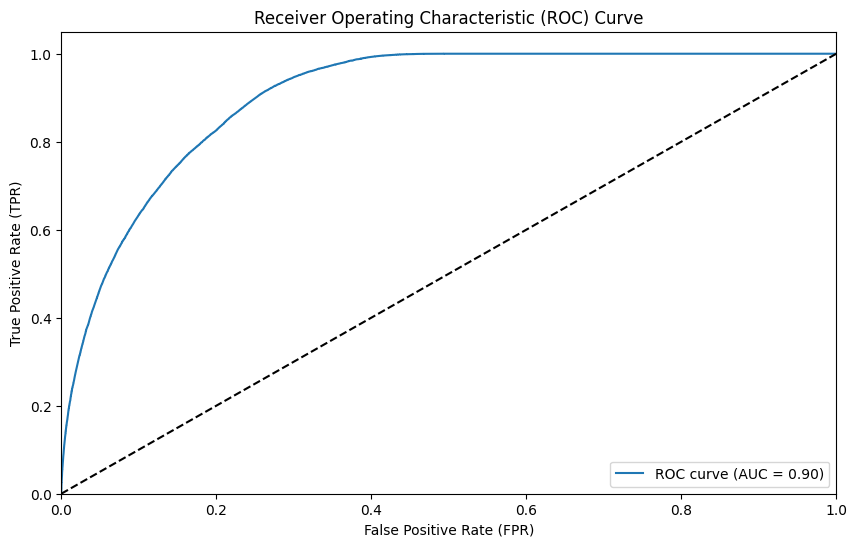

In [76]:
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for the positive class
y_pred_prob = rf_bayes.predict_proba(X_ros)[:, 1]

# Compute the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_ros, y_pred_prob)

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


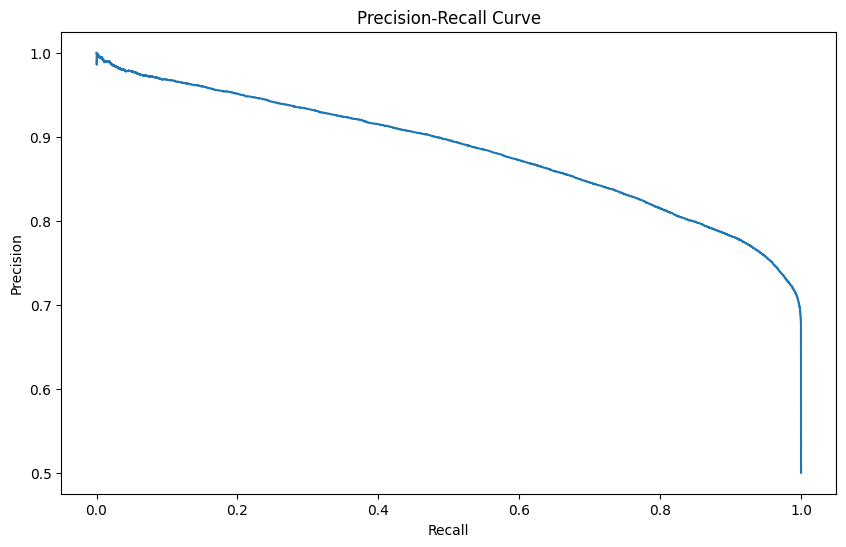

In [77]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt



# Get the predicted probabilities for the positive class
y_pred_prob = rf_bayes.predict_proba(X_ros)[:, 1]

# Compute precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_ros, y_pred_prob)

# Plot precision-recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


### ROC Curve for Test Data

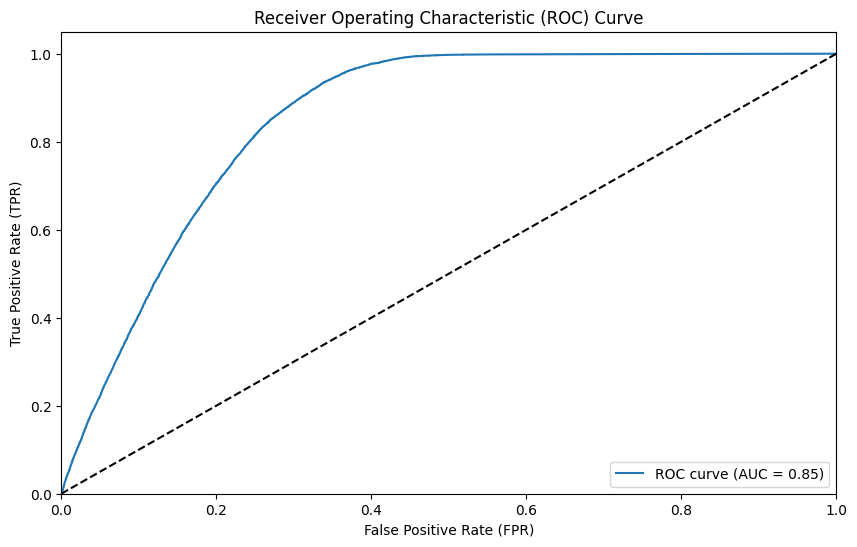

In [78]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class
y_pred_prob = rf_bayes.predict_proba(Xtest)[:, 1]

# Compute the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob)

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


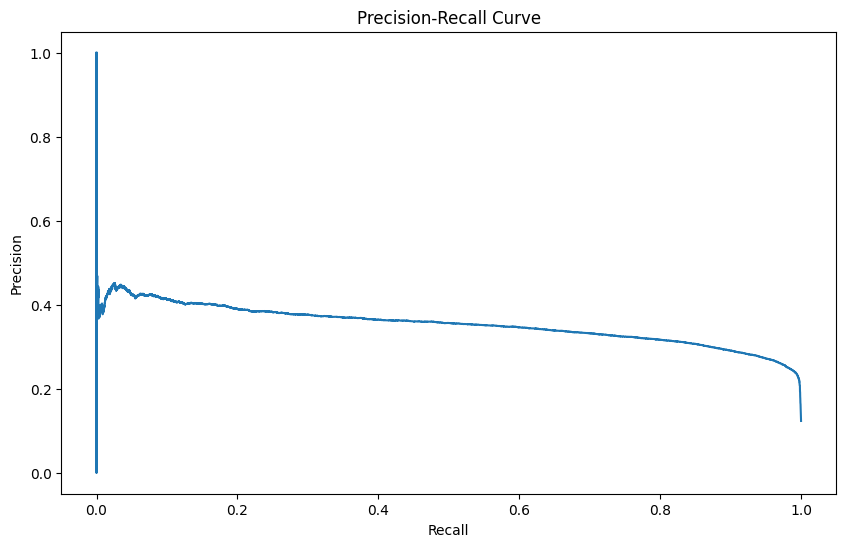

In [79]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class
y_pred_prob = rf_bayes.predict_proba(Xtest)[:, 1]

# Compute precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(ytest, y_pred_prob)

# Plot precision-recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


## HyperParameter Tuning on LGBM Classifier

In [80]:
lgbm = ltb.LGBMClassifier()
#Cross validation and hyperparameter tuning
lg_bayes = BayesSearchCV(estimator= lgbm,
                         search_spaces = {
                          'max_depth':Integer(4,100) ,
                          'num_leaves': Integer(3,200),
                          'n_estimators': Integer(3,200),
                          'min_split_gain': Integer(1.0,10.0),
                          'n_jobs': Integer(1,30),
                        },
                       cv = 5, verbose=2, scoring='accuracy', n_iter=10)

lg_bayes.fit(X_ros,y_ros)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=29, min_split_gain=3, n_estimators=50, n_jobs=11, num_leaves=131; total time=   6.6s
[CV] END max_depth=29, min_split_gain=3, n_estimators=50, n_jobs=11, num_leaves=131; total time=   6.7s
[CV] END max_depth=29, min_split_gain=3, n_estimators=50, n_jobs=11, num_leaves=131; total time=   7.1s
[CV] END max_depth=29, min_split_gain=3, n_estimators=50, n_jobs=11, num_leaves=131; total time=   6.5s
[CV] END max_depth=29, min_split_gain=3, n_estimators=50, n_jobs=11, num_leaves=131; total time=   7.3s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=40, min_split_gain=7, n_estimators=66, n_jobs=21, num_leaves=105; total time=   7.9s
[CV] END max_depth=40, min_split_gain=7, n_estimators=66, n_jobs=21, num_leaves=105; total time=   7.6s
[CV] END max_depth=40, min_split_gain=7, n_estimators=66, n_jobs=21, num_leaves=105; total time=   8.5s
[CV] END max_depth=40, min_split_gain=7, n_estimat

BayesSearchCV(cv=5, estimator=LGBMClassifier(), n_iter=10, scoring='accuracy',
              search_spaces={'max_depth': Integer(low=4, high=100, prior='uniform', transform='normalize'),
                             'min_split_gain': Integer(low=1.0, high=10.0, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=3, high=200, prior='uniform', transform='normalize'),
                             'n_jobs': Integer(low=1, high=30, prior='uniform', transform='normalize'),
                             'num_leaves': Integer(low=3, high=200, prior='uniform', transform='normalize')},
              verbose=2)

In [81]:
lg_bayes.best_params_

OrderedDict([('max_depth', 29),
             ('min_split_gain', 3),
             ('n_estimators', 50),
             ('n_jobs', 11),
             ('num_leaves', 131)])

In [82]:
lg_bayes.best_estimator_

LGBMClassifier(max_depth=29, min_split_gain=3, n_estimators=50, n_jobs=11,
               num_leaves=131)

In [83]:
# prediction
lgtrain_pred=lg_bayes.best_estimator_.predict(X_ros)
lgtest_pred=lg_bayes.best_estimator_.predict(Xtest)

Calculating accuracy on train and test

In [84]:
train_accuracy = accuracy_score(y_ros, lgtrain_pred)
test_accuracy = accuracy_score(ytest, lgtest_pred)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.8152294604497817
The accuracy on test dataset is 0.709042883506949


## Confusion Matrix

In [85]:
train_cm = confusion_matrix(y_ros, lgtrain_pred)
test_cm = confusion_matrix(ytest, lgtest_pred)

In [86]:
print(classification_report(y_ros,lgtrain_pred))
print("\n")
print(classification_report(ytest,lgtest_pred))

              precision    recall  f1-score   support

           0       0.93      0.68      0.79    234158
           1       0.75      0.95      0.84    234158

    accuracy                           0.82    468316
   macro avg       0.84      0.82      0.81    468316
weighted avg       0.84      0.82      0.81    468316



              precision    recall  f1-score   support

           0       0.98      0.68      0.80    100241
           1       0.29      0.92      0.44     14092

    accuracy                           0.71    114333
   macro avg       0.64      0.80      0.62    114333
weighted avg       0.90      0.71      0.76    114333



### ROC Curve for Train Data

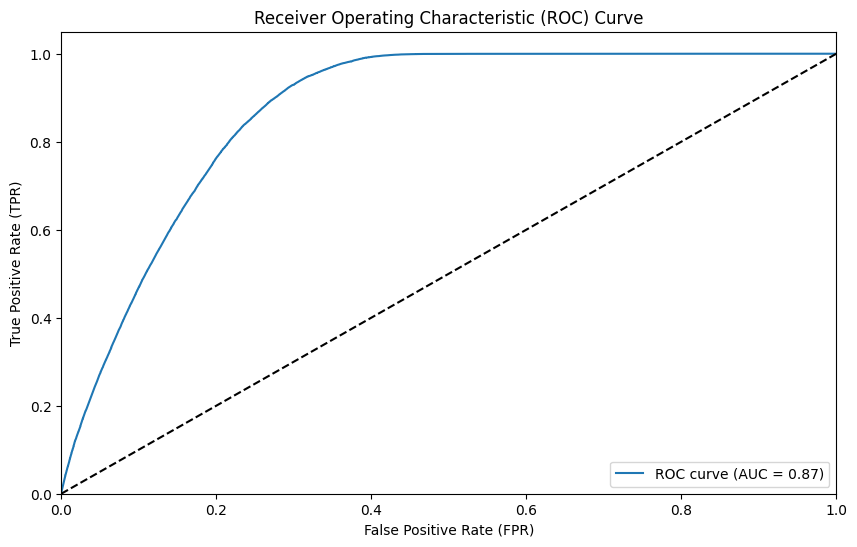

In [87]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class
y_pred_prob = lg_bayes.predict_proba(X_ros)[:, 1]

# Compute the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_ros, y_pred_prob)

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


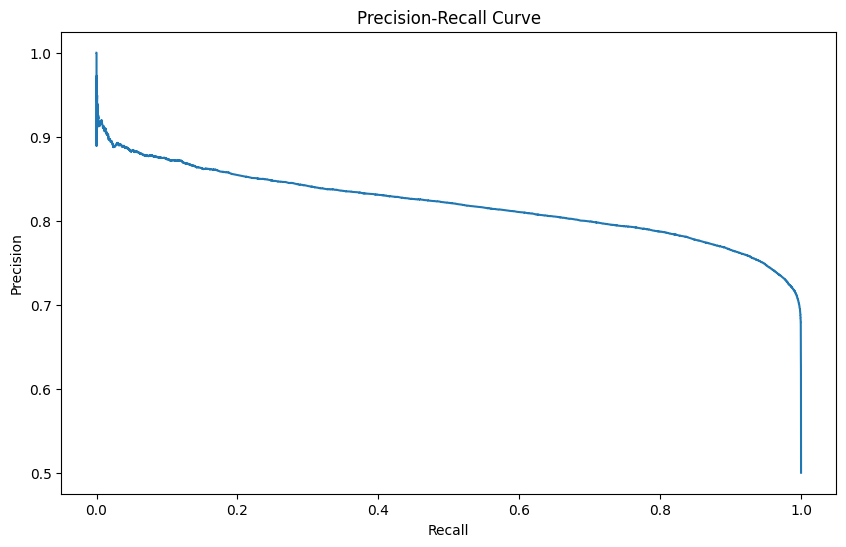

In [88]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class
y_pred_prob = lg_bayes.predict_proba(X_ros)[:, 1]

# Compute precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_ros, y_pred_prob)

# Plot precision-recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


### ROC Curve for Test Data

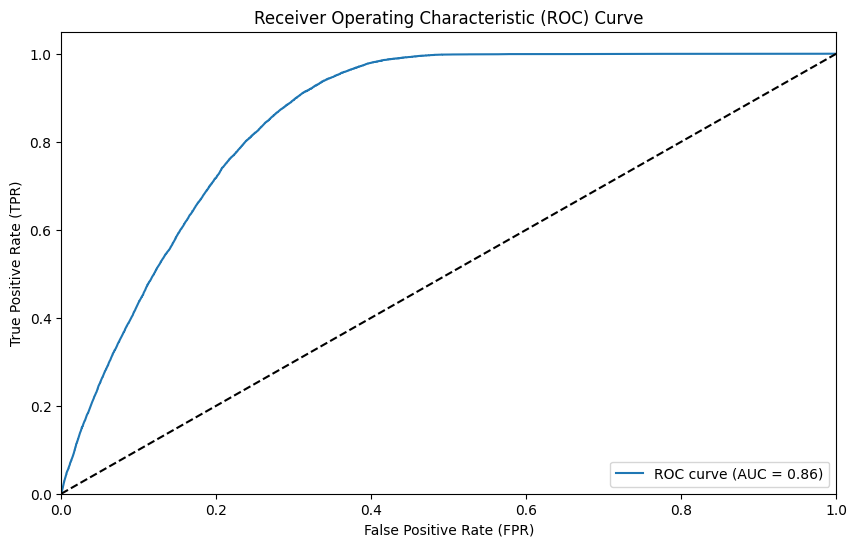

In [89]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class
y_pred_prob = lg_bayes.predict_proba(Xtest)[:, 1]

# Compute the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob)

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


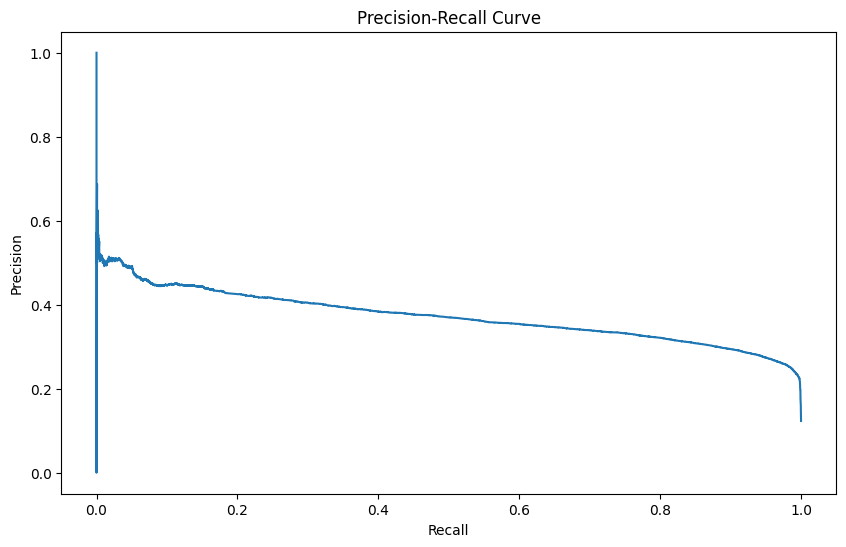

In [90]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class
y_pred_prob = lg_bayes.predict_proba(Xtest)[:, 1]

# Compute precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(ytest, y_pred_prob)

# Plot precision-recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


### Observations

1. The ML model for the problem statement was created using python with the help of the dataset and the ML model created with LGBM and Random Forest models performed better than other models.

2. In comparison to both models the LGBM model performed well on the most essential evaluation metric 'Recall,' with values of 0.95 on train data and 0.91 on test data. As a result, we conclude LGBMClassifier is the best model for this dataset.

## Most important features beneficial for client

In [91]:
importances = lg_bayes.best_estimator_.feature_importances_
importance_dict = {'Feature' : train_col_list,
                   'Feature Importance' : importances}
importance_df = pd.DataFrame(importance_dict)

In [92]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

Let's have a look at our top features

In [93]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
6,Annual_Premium,1976
2,Region_Code,1565
0,Age,1446
7,Policy_Sales_Channel,1127
4,Vehicle_Age,141
5,Vehicle_Damage,90
8,Gender_Male,66
3,Previously_Insured,56
1,Driving_License,33


## Observations

The most important features are listed form top to bottom -
1. Annual_Premium
2. Age
3. Region_Code
4. Policy_Sales_Channel
5. Vehicle_Age

# Conclusion

Our client is an insurance firm that has previously provided with Health Insurance to its customers. They now need assistance in developing a model to predict whether the policyholders (customers) will be interested in the company's Vehicle Insurance.

Building a model to predict if a client is interested in Vehicle Insurance is extremely productive for the company as it will assist them to plan communication strategy to reach out to those customers and optimise its business model and revenue.

In the dataset we were provided with information about demographics (gender, age, region code type), vehicles (vehicle age, damage), policies (premium, sourcing channel), and so on for our Model Building.

## **Key points**:

1. Customers of age between 30 to 60 are more likely to buy insurance.

2. Customers with Vehicle_Damage are likely to buy insurance.

3. Customers with Driving License have higher chance of buying Insurance.

4. The variable such as Age, Previously_insured,Annual_premium are more affecting the target variable.

5. We can see that LGBM model preform better for this dataset.

## **Suggestions**:

1. By using a marketing and advertising approach, we can reduce the gender gap.

2. We can clearly see that we have a larger number of consumers without vehicle insurance, therefore we can easily target them directly with our campaign.

3. Since there are less policy holders with vehicles older than two years, we must pay more attention to the other two categories (1-2 years and >1 year). Because most sales agencies that offer vehicle insurance for the first year are actually our target and we can give them the best incentives to reduce competition in the market.

4. As we saw that we have nearly equal policy holders for both vehicle damage status, so we can target those policy holders whose vehicles are damaged in the past.